### Loading and plotting some real _C. elegans_ datasets.
---
*Last updated: 13 November 2023*

We have obtained "whole brain" calcium imaging data from a few open source datasets. 
 __________________________________________________________________________________________________________________________________________________________
|Paper Link              |Database Link              |Files w/ Data          |Num. worms   |Mean num neurons ID'd/recorded |Num. ID'd neurons (min, max)  |
|------------------------|---------------------------|-----------------------|-------------|-------------------------------|------------------------------|
|tinyurl.com/Flavell2023 |wormwideweb.org            |`YYYY-MM-DD-*.json/h5` |      42     |            88/136             |          (64, 115)           |
|tinyurl.com/Leifer2023  |osf.io/e2syt/              |`exported_data.tar.gz` |      103    |            69/122             |          (26, 102)           |
|tinyurl.com/Uzel2022    |osf.io/3vkxn/              |`Uzel_WT.mat`          |      6      |            50/138             |          (46, 58)            |
|tinyurl.com/Yemini2021  |zenodo.org/records/3906530 |`*_Activity_OH*.mat`   |      49     |           110/125             |          (33, 179)           |
|tinyurl.com/Kaplan2020a |osf.io/9nfhz/              |`Neuron2019_Data_*.mat`|      19     |            36/114             |          (23, 51)            |
|tinyurl.com/Skora2018   |osf.io/za3gt/              |`WT_*.mat`             |      12     |            46/129             |          (39, 55)            |
|tinyurl.com/Nichols2017 |osf.io/kbf38/              |`*let.mat`             |      44     |            34/108             |          (23, 43)            |
|tinyurl.com/Kato2015    |osf.io/2395t/              |`WT_*Stim.mat`         |      12     |            42/127             |          (31, 51)            |
|________________________|___________________________|_______________________|_____________|_______________________________|______________________________|



### What's the distinction between "whole-brain" and "whole-nervous system" recordings? 

The nervous system of the _C. elegans_ hermaphrodite is composed of 302 neurons that are organized in several 
ganglia in the head and tail and into a spinal cord-like ventral nerve cord [1]. The majority of the neurons 
is located in the head, where they are organised in a number of ganglia surrounding the pharynx, forming the 
brain of the animal [2].

References:
- [1] http://www.wormbook.org/chapters/www_specnervsys.2/neurogenesis.html<br>
- [2] https://www.sfu.ca/biology/faculty/hutter/hutterlab/research/Ce_nervous_system.html<br>

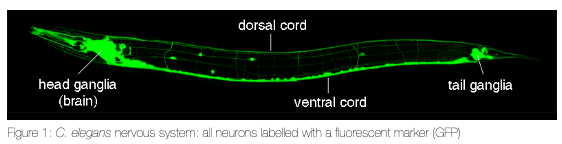

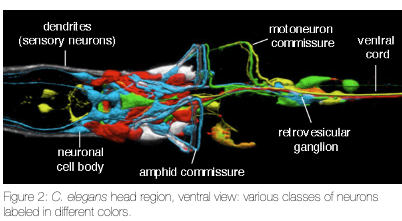

In [1]:
import numpy as np

from visualize._utils import plot_worm_data
from data._utils import pick_worm, load_dataset

CUDA device found.


['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11']

Avg num. neurons ID'd/recorded : 42/127
Range num. ID'd neurons : (31, 51)
Range len. calcium data : (719, 1079)


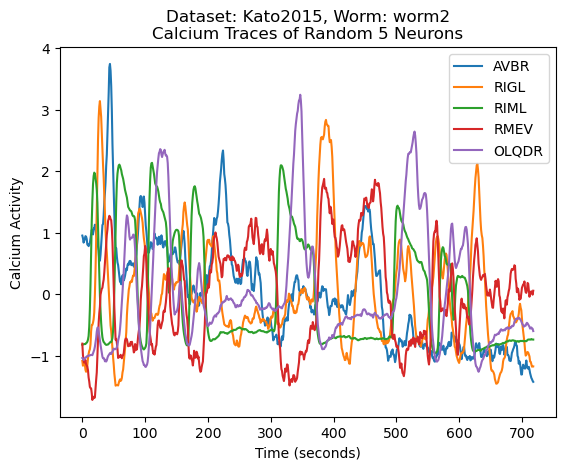

In [2]:
# @title Kato et al., Cell 2015, _Global Brain Dynamics Embed the Motor Command Sequence of Caenorhabditis elegans_
# @markdown Source: https://osf.io/2395t/

# load the dataset
Kato2015 = load_dataset("Kato2015")
print(list(Kato2015.keys()), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Kato2015.keys()):
    single_worm_dataset = pick_worm(Kato2015, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Kato2015)
    named_avg += named_neurons / len(Kato2015)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Kato2015.keys()))
single_worm_dataset = pick_worm(Kato2015, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43']

Avg num. neurons ID'd/recorded : 34/108
Range num. ID'd neurons : (23, 43)
Range len. calcium data : (1079, 1079)


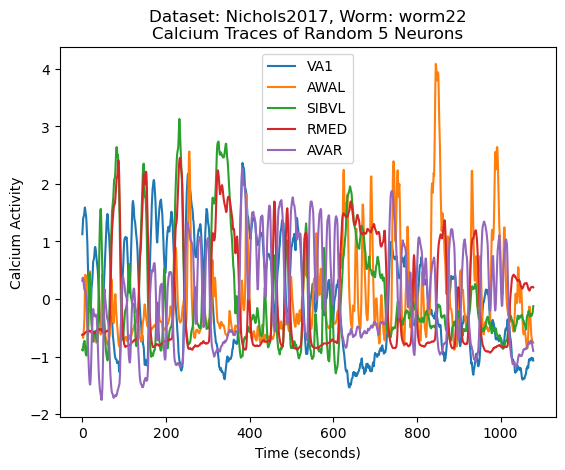

In [3]:
# @title Nichols et al., Science 2017, _A global brain state underlies C. elegans sleep behavior_
# @markdown Source: https://osf.io/kbf38/

# load the dataset
Nichols2017 = load_dataset("Nichols2017")
print(list(Nichols2017.keys()), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Nichols2017.keys()):
    single_worm_dataset = pick_worm(Nichols2017, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Nichols2017)
    named_avg += named_neurons / len(Nichols2017)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Nichols2017.keys()))
single_worm_dataset = pick_worm(Nichols2017, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11'])

Avg num. neurons ID'd/recorded : 46/129
Range num. ID'd neurons : (39, 55)
Range len. calcium data : (1079, 1079)


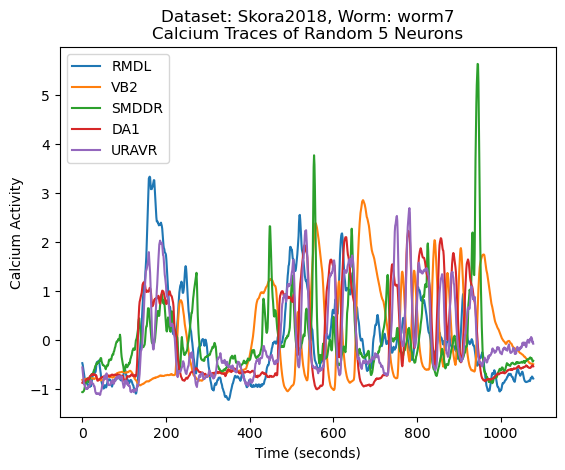

In [4]:
# @title Skora et al., Cell Reports 2018, _Energy Scarcity Promotes a Brain-wide Sleep State Modulated by Insulin Signaling in C. elegans_
# @markdown Source: https://osf.io/za3gt/

# load the dataset
Skora2018 = load_dataset("Skora2018")
print(Skora2018.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Skora2018.keys()):
    single_worm_dataset = pick_worm(Skora2018, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Skora2018)
    named_avg += named_neurons / len(Skora2018)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Skora2018.keys()))
single_worm_dataset = pick_worm(Skora2018, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18'])

Avg num. neurons ID'd/recorded : 36/114
Range num. ID'd neurons : (23, 51)
Range len. calcium data : (1799, 1800)


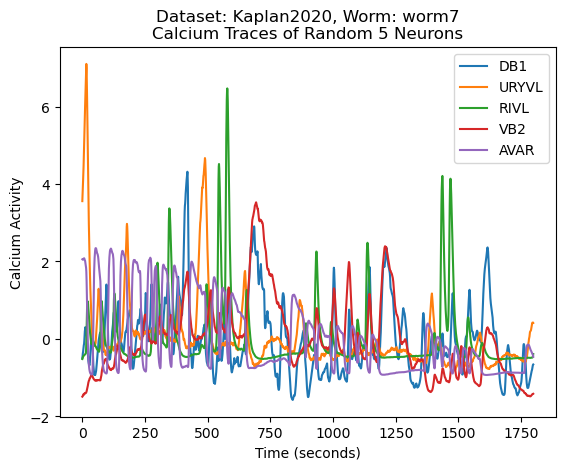

In [5]:
# @title Kaplan et al., Neuron 2020, _Nested Neuronal Dynamics Orchestrate a Behavioral Hierarchy across Timescales_
# @markdown Source: https://osf.io/9nfhz/

# load the dataset
Kaplan2020 = load_dataset("Kaplan2020")
print(Kaplan2020.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Kaplan2020.keys()):
    single_worm_dataset = pick_worm(Kaplan2020, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Kaplan2020)
    named_avg += named_neurons / len(Kaplan2020)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Kaplan2020.keys()))
single_worm_dataset = pick_worm(Kaplan2020, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48'])

Avg num. neurons ID'd/recorded : 110/125
Range num. ID'd neurons : (33, 179)
Range len. calcium data : (232, 239)


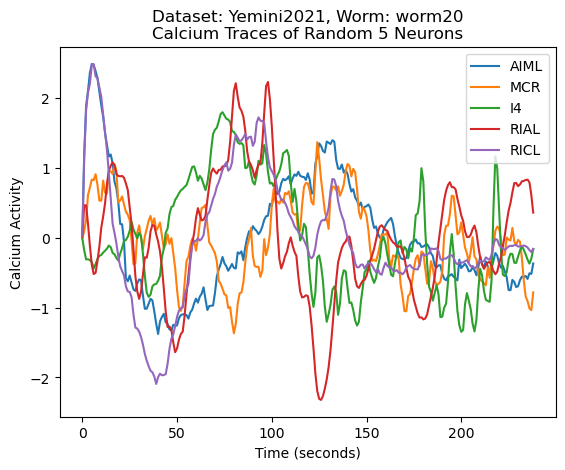

In [6]:
# @title Yemini et al., Cell CurrBio 2022, _NeuroPAL: A Multicolor Atlas for Whole-Brain Neuronal Identification in C. elegans_
# @markdown Source: https://zenodo.org/records/3906530

# load the dataset
Yemini2021 = load_dataset("Yemini2021")
print(Yemini2021.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Yemini2021.keys()):
    single_worm_dataset = pick_worm(Yemini2021, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Yemini2021)
    named_avg += named_neurons / len(Yemini2021)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Yemini2021.keys()))
single_worm_dataset = pick_worm(Yemini2021, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5'])

Avg num. neuron ID'd/recorded : 50/138
Range num. ID'd neurons : (46, 58)
Range len. calcium data : (1079, 1079)
Avg num. ID'd : 50/138


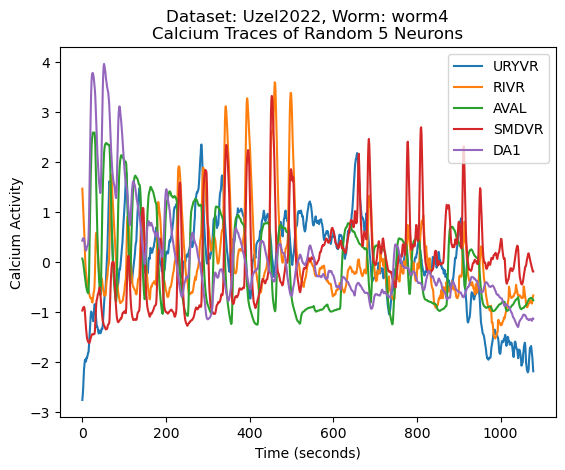

In [7]:
# @title Uzel et al., Cell CurrBio 2022, _A set of hub neurons and non-local connectivity features support global brain dynamics in C. elegans_
# @markdown Source: https://osf.io/3vkxn/

# load the dataset
Uzel2022 = load_dataset("Uzel2022")
print(Uzel2022.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Uzel2022.keys()):
    single_worm_dataset = pick_worm(Uzel2022, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Uzel2022)
    named_avg += named_neurons / len(Uzel2022)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neuron ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")
print(f"Avg num. ID'd : {int(named_avg)}/{int(total_avg)}")

# get data for one worm
worm = np.random.choice(list(Uzel2022.keys()))
single_worm_dataset = pick_worm(Uzel2022, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

dict_keys(['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', 'worm45', 'worm46', 'worm47', 'worm48', 'worm49', 'worm50', 'worm51', 'worm52', 'worm53', 'worm54', 'worm55', 'worm56', 'worm57', 'worm58', 'worm59', 'worm60', 'worm61', 'worm62', 'worm63', 'worm64', 'worm65', 'worm66', 'worm67', 'worm68', 'worm69', 'worm70', 'worm71', 'worm72', 'worm73', 'worm74', 'worm75', 'worm76', 'worm77', 'worm78', 'worm79', 'worm80', 'worm81', 'worm82', 'worm83', 'worm84', 'worm85', 'worm86', 'worm87', 'worm88', 'worm89', 'worm90', 'worm91', 'worm92', 'worm93', 'worm94', 'worm95', 'worm96', 'worm97', 'worm98', 'worm99',

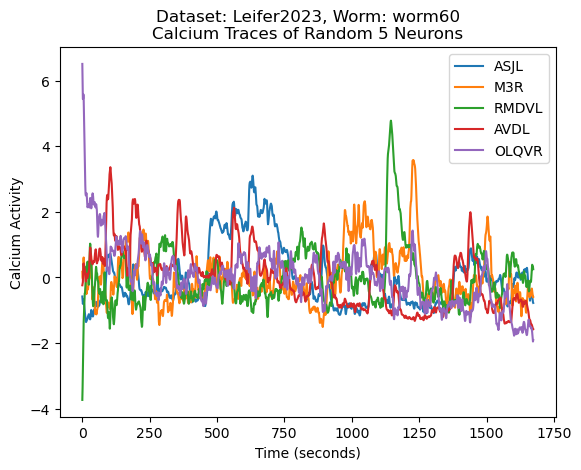

In [8]:
# @title Randi et al., arXiv 2023, _Neural signal propagation atlas of C. elegans_
# @markdown Source: https://osf.io/e2syt/

# load the dataset
Leifer2023 = load_dataset("Leifer2023")
print(Leifer2023.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Leifer2023.keys()):
    single_worm_dataset = pick_worm(Leifer2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Leifer2023)
    named_avg += named_neurons / len(Leifer2023)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Leifer2023.keys()))
single_worm_dataset = pick_worm(Leifer2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

dict_keys(['worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40'])

Avg num. neurons ID'd/recorded : 88/136
Range num. ID'd neurons : (64, 115)
Range len. calcium data : (961, 971)


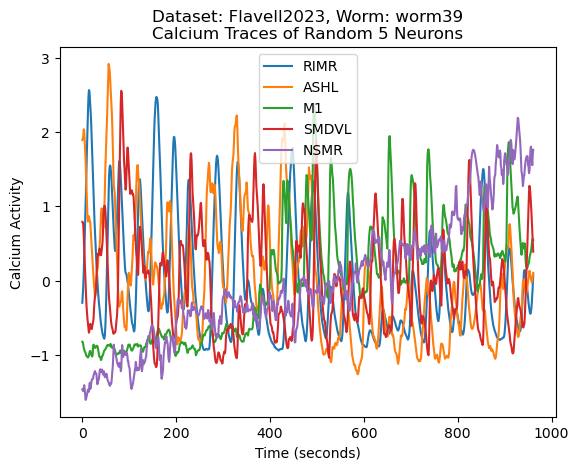

In [9]:
# @title Atanas, Kim et al., bioRxiv 2022, _Brain-wide representations of behavior spanning multiple timescales and states in C. elegans_
# @markdown Source: wormwideweb.org

# load the dataset
Flavell2023 = load_dataset("Flavell2023")
print(Flavell2023.keys(), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Flavell2023.keys()):
    single_worm_dataset = pick_worm(Flavell2023, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Flavell2023)
    named_avg += named_neurons / len(Flavell2023)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Flavell2023.keys()))
single_worm_dataset = pick_worm(Flavell2023, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)